In [1]:
%matplotlib inline

In [27]:
import pandas
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from scipy import integrate
import pylab
matplotlib.style.use('ggplot')

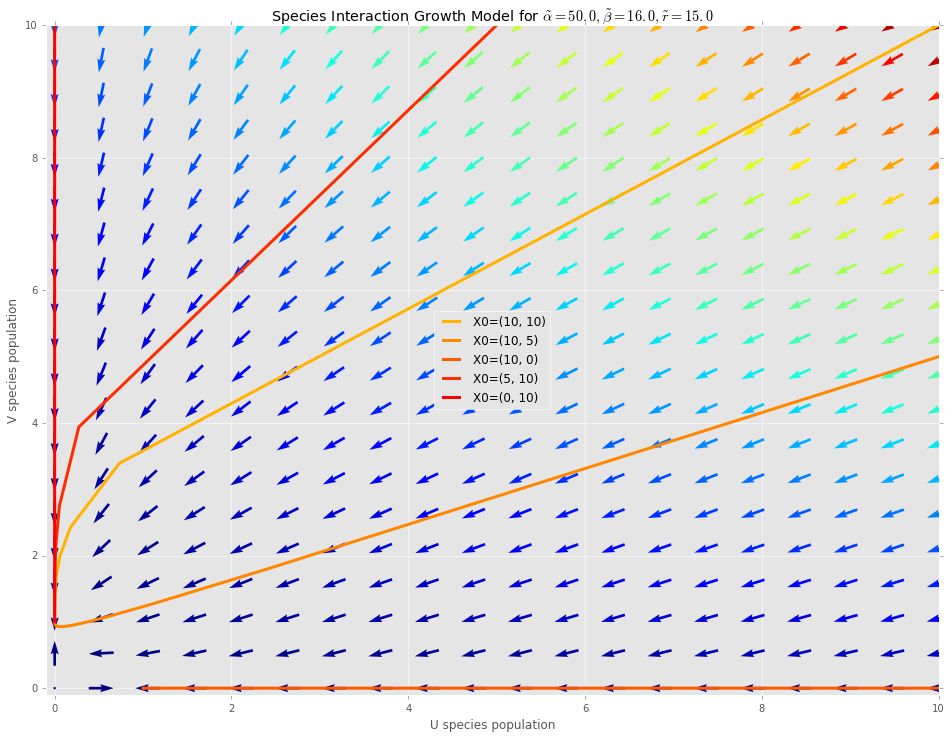

In [59]:
# X = [u, v] describes both populations

alpha_hat = 50.0
beta_hat = 16.0
r_hat = 15.0
T_0 = 0
T_f = 30
T_steps = 100 * T_f
tau = np.linspace(T_0, T_f, T_steps)
NUM_PHASE_ARROWS = 20

def dX_dtau(X, t=0):
    u, v = X
    return np.array([u - u ** 2 - alpha_hat * u * v,
                 r_hat * (v - v ** 2) - beta_hat * u * v])

def d2X_dtau2(X, t=0):
    # The Jacobian matrix
    u, v = X
    return np.array([[1 - 2 * u - alpha_hat * v, -1 * alpha_hat * u],
                 [- 1 * beta_hat * v, r_hat * (1 - 2 * v) - beta_hat * u]])


X_0_values = [np.array([10, 10]), np.array([10, 5]), np.array([10, 0]), np.array([5, 10]), np.array([0, 10])]
colors = pylab.cm.autumn_r(np.linspace(0.3, 1., len(X_0_values)))

plt.figure(figsize=(16, 12), dpi=800)    
plt.xlabel('U species population')
plt.ylabel('V species population') 
title_format = r'Species Interaction Growth Model for ' + \
            r'$\tilde{{\alpha}} = {alpha}, \tilde{{\beta}} = {beta}, \tilde{{r}} = {r}$'
plt.title(title_format.format(alpha=alpha_hat, beta=beta_hat, r=r_hat))

for X_0, color in zip(X_0_values, colors):
    X, infodict = integrate.odeint(dX_dtau, X_0, tau, full_output=True)
    if 'Integration successful.' != infodict['message']:
        raise ValueError('Integration failed')
    
    u, v = X.T
    plt.plot(u ,v, lw=3, color=color, label='X0=({X_0[0]}, {X_0[1]})'.format(X_0=X_0))
    
u_max = plt.xlim(xmin=-0.1)[1]
v_max = plt.ylim(ymin=-0.1)[1]
plt.legend(loc=0)

u_range = np.linspace(0, u_max, NUM_PHASE_ARROWS)
v_range = np.linspace(0, v_max, NUM_PHASE_ARROWS)

u_grid, v_grid = np.meshgrid(u_range, v_range)
du, dv = dX_dtau([u_grid, v_grid])
norm_du_dv = np.hypot(du, dv)
norm_du_dv[norm_du_dv == 0] = 1 # we normalize by the norm, so avoid division by zero
du /= norm_du_dv
dv /= norm_du_dv
plt.quiver(u_range, v_range, du, dv, norm_du_dv, pivot='mid', cmap=pylab.cm.jet)

    

In [53]:
u_range

array([[ 10.]])